In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#写経【1】
# データセットの読み込み

# bostonデータを格納したクラス
from sklearn.datasets import load_boston

# インスタンスを生成
boston = load_boston()

### describeの確認

収録されているデータの詳細（describe）は**<font color='red'>boston.DESCR</font>**から確認することができます｡

In [3]:
#写経【2】
# データの詳細を出力
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 含まれている特徴量の確認

続いて､データの中身を観察していきます｡まず､**<font color='red'>データにどんな特徴量が含まれているのか</font>**を調べてみましょう｡

In [4]:
#写経【3】
# どんな説明変数があるのかを確認
# 項目名がbostonのfeature_namesに格納されている
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 変数の確認

**<font color='red'>説明変数</font>**と**<font color='red'>目的変数</font>**を出力して確認してみましょう｡

In [5]:
#写経【4】
# 説明変数を確認
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
#写経【5】
# 目的変数を確認
# 住宅価格の中央値MEDV
# 数が多いので､初めの50個のみを出力
boston.target[:50]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

## 3.2 データの観察
ここから､データの中身を詳細に観察していきます｡

まずは､pandasのDataFrameを用いてデータの整形を行いましょう｡

In [7]:
#写経【6】
# Pandasのデータフレームに変換
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#写経【7】
# 目的変数もDataFrameに変換
# 各区画について住宅価格の中央値が格納されているのでMEDVと命名
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### DataFrameの結合

この先に行う処理の都合上､**説明変数と目的変数のDataFrameを結合します**｡

In [9]:
#写経【8】
# 説明変数と目的変数のDataFrameを結合する
# MEDVが右端に付け加えられた事を確認
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 散布図行列による可視化

今回のように､3つ以上の変数がある場合は通常の散布図ではなく､**<font color='red'>散布図行列</font>**というものを出力したほうが観察しやすくなります｡


In [10]:
#写経【9】
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
df_pickup = df.loc[:, ['LSTAT', 'INDUS', 'DIS', 'RM', 'MEDV']]

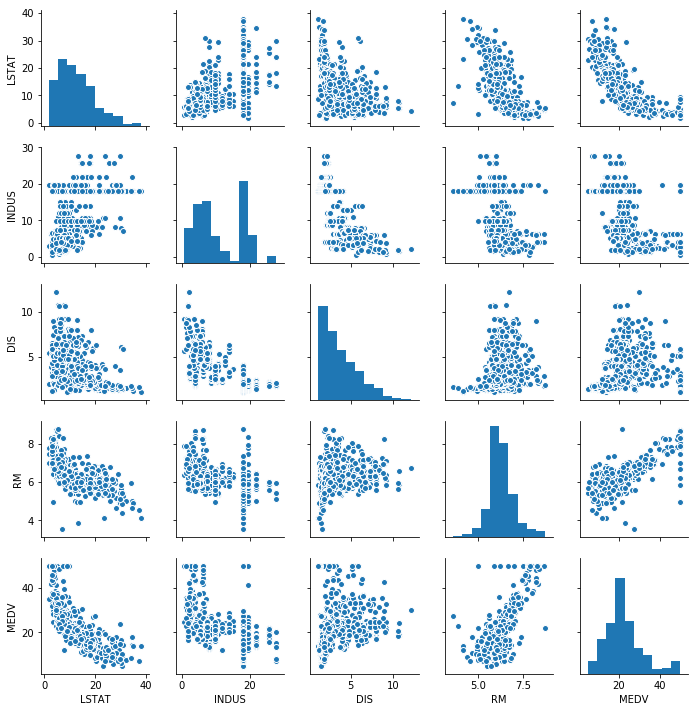

In [11]:
#写経【10】
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(df_pickup, size=2.0)
plt.show()

### 相関係数行列の観察

散布図行列を観察したところで､次に**<font color='red'>相関係数行列</font>**を観察してみましょう｡

In [12]:
#写経【11】
# 相関係数行列を出力
# 数値の羅列になるので見づらい
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### ヒートマップ

ヒートマップとは､**<font color='red'>たくさんの数字の羅列を色付きのマップに映し出す手法</font>**です｡

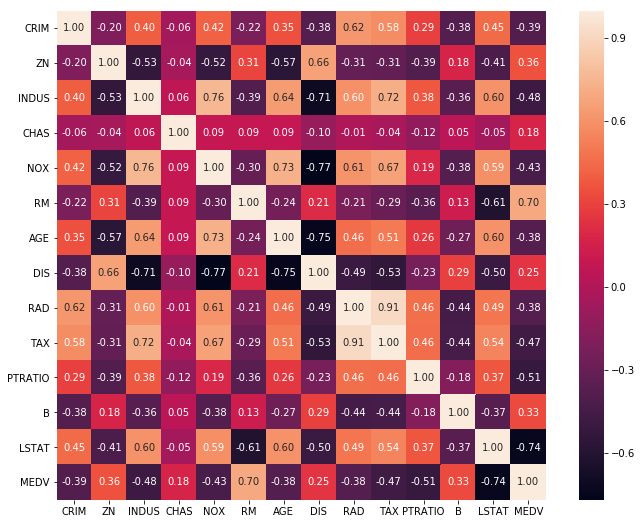

In [13]:
#写経【12】
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

### 基本統計量

また､必要に応じて**<font color='red'>基本統計量</font>**を出力することもできます｡

In [14]:
#写経【13】
# 基本統計量を出力
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3.3 前処理



In [15]:
#写経【14】
# 説明変数のデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
X = df.loc[:, ['LSTAT', 'RM']].values
X

array([[4.98 , 6.575],
       [9.14 , 6.421],
       [4.03 , 7.185],
       ...,
       [5.64 , 6.976],
       [6.48 , 6.794],
       [7.88 , 6.03 ]])

In [16]:
#写経【15】
# 教師データを用意
# DataFrameの.valuesメソッドでarrayに変換できます
y = df.loc[:, ['MEDV']].values

# どのように入っているか、最初の１０個を表示して確認
y[:10]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [17]:
#写経【16】
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### 分割されたデータを確認

In [18]:
#写経【17】
# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)

(506, 2)
(506, 1)


In [19]:
#写経【18】
# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)

(354, 2)
(354, 1)


In [20]:
#写経【19】
# testデータのサンプル数を確認
print(X_test.shape)
print(y_test.shape)

(152, 2)
(152, 1)


## 3.4 線形重回帰モデルの学習

データの分割が終わったところで､単回帰分析のときと同じ勾配降下法で学習を行います｡

In [21]:
#写経【20】
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
#写経【21】
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### モデルの解釈

単回帰分析のときと同じように､パラメータの数値から得られたモデルを解釈していきましょう｡

In [23]:
#写経【22】
# 定数項を出力
lr.intercept_

array([-2.53724672])

In [24]:
#写経【23】
# 偏回帰係数を出力
# [LSTATの係数, RMの係数]
lr.coef_

array([[-0.6418309 ,  5.27350522]])

### 分析結果の利用

さて､それでは学習させたモデルを利用して､**物件のお買い得度の評価**をしましょう｡

In [25]:
#写経【24】
# 新しい物件についてLSTATとRMを入力
# ([[LSTAT, RM]])
X_new = np.array([[12, 3]])

# 販売価格を入力
y_prop = 15

# 適正価格を予測
y_pred = lr.predict(X_new)

# 割高度を計算
price_ratio = y_prop / y_pred

# 出力
print('y_prop      : %.2f' % y_prop)
print('y_pred      : %.2f' % y_pred)
print('price_ratio : %.2f' % price_ratio)

y_prop      : 15.00
y_pred      : 5.58
price_ratio : 2.69


## 3.5 モデルの性能評価

続いて､**学習させたモデルがどの程度信頼できるものなのか**を､以下の4つの指標を用いて評価します｡

#### 数値による評価
1. 決定係数
2. RMSE

#### グラフによる評価
1. 残差プロット
2. グラフの出力

In [26]:
#写経【25】
# 決定係数をtrainとtestに分けて出力
# 過学習しているかどうかを確認
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.651
test : 0.607


決定係数を見ると､**学習させたモデルはあまり当てはまりが良いとは言えなさそうです**｡何か当てはまりを悪くする原因があったのでしょうか｡調べていく必要がありそうです｡また､testデータの方が若干小さくなっているので､**やや過学習の傾向もありそうです**｡

### 自由度調整済み決定係数

**自由度調整済み決定係数**とは､**<font color='red'>決定係数の改良版</font>**です｡実は､決定係数には**<font color='red'>予測の役に立たない変数を追加していくと､数値が意味もなく大きくなっていってしまう</font>**という欠点があり､それを改善しています｡scikit-learnには収録されていませんので､簡単に関数を定義しました｡**特別な理由がない限りは､こちらを参考にする方が望ましいです**｡評価の目安は決定係数と同様です｡

In [27]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [28]:
#写経【26】
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.648955
test : 0.601704


### 2. RMSE（Root Mean Square Error: 平均二乗誤差の平方根）

**RMSE**とは､そのモデルについて､**<font color='red'>通常､予測が正解からどれだけズレるか</font>**を表した指標です

In [29]:
#写経【27】
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE
train: 5.439
test : 5.721


In [30]:
#写経【28】
# 基本統計量をもう一度確認
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###  残差プロット（Residuals Plot）

**残差プロット**とは､**<font color='red'>予測の外れ方の傾向を視覚的に掴む手法</font>**です｡

In [31]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

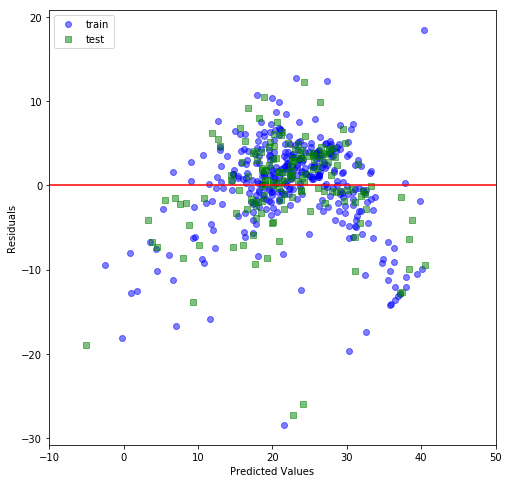

In [32]:
#写経【29】
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

### 2. 回帰平面の可視化

今回は､2つの特徴量を利用していますので､回帰式は目的変数を含めて**<font color='red'>3次元の空間内の平面</font>**を表しています｡

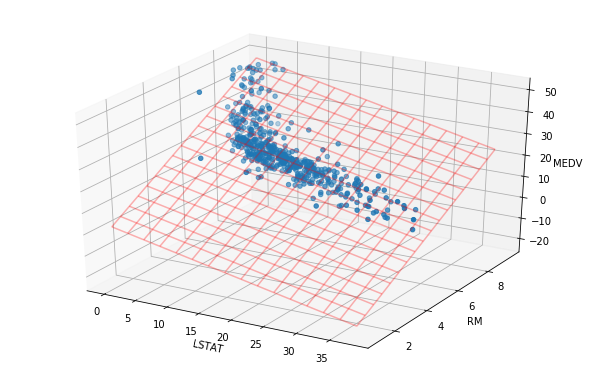

In [33]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(8, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'])

# # 回帰平面の方程式を定義
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# ここまでの内容でグラフをプロット
plt.show()

## 3.6 標準化重回帰分析


変数の標準化は､sklearn.preprocessingに収録されている**StandardScaler**クラスを用いて行うことができます｡

In [34]:
#写経【3０】
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(boston.data) # すべての説明変数を変換
y_std = ss.fit_transform(y)

#### 標準化された変数の確認
標準化された変数を確認します｡

In [35]:
#写経【3１】
# 標準化された説明変数を確認
X_std[:5]

array([[-0.41771335,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41468015, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41040922, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

In [36]:
#写経【3２】
# 標準化された目的変数を確認
y_std[:10]

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548]])

#### 平均の確認

**<font color='red'>平均が0になっていることを確認しましょう</font>**｡

In [37]:
#写経【3３】
# 標準化した説明変数の平均を確認
# arrayのmean()メソッドで出力できる
X_std.mean()

-1.1233877245218975e-15

In [38]:
#写経【3４】
# 標準化した目的変数の平均を確認
# arrayのmean()メソッドで出力できる
y_std.mean()

-5.195668225913776e-16

#### 標準偏差の確認

続いて､**<font color='red'>標準偏差が1になっていることを確認しましょう</font>**｡

In [39]:
#写経【3５】
# 標準化した説明変数の標準偏差を確認
# arrayのstd()メソッドで出力できる
X_std.std()

0.9999999999999994

In [40]:
#写経【3６】
# 標準化した目的変数の標準偏差を確認
# arrayのmean()メソッドで出力できる
y_std.std()

0.9999999999999999

#### 学習

それでは､標準化させた変数を用いて学習を行います｡

In [41]:
#写経【３７】
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 標準化偏回帰係数の比較

標準化偏回帰係数を比較します｡

In [42]:
#写経【３８】
# 標準偏回帰係数を出力
lr_std.coef_

array([[-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
         0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
        -0.22443985,  0.09323458, -0.40799686]])